In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, \
                            precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-07-11 12:14:26.346294: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [98]:
mpl.rcParams['figure.figsize'] = (12, 10)

In [99]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [100]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [101]:
neg, pos = df['Class'].value_counts().values
total = neg + pos
total, pos, f'{pos / total * 100:.2f}%'

(284807, 492, '0.17%')

In [102]:
df_cp = df.copy()
df_cp.loc[:, 'Time'] = df.loc[:, 'Time'].apply(lambda t: t / 3600 % 24)
df_cp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,23.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,23.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [103]:
eps = 0.001
df_cp['Amount'] = np.log(df['Amount'] + eps)
df_cp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.260067,0
284803,23.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210481,0
284804,23.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217756,0
284805,23.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.302685,0


<Axes: ylabel='Frequency'>

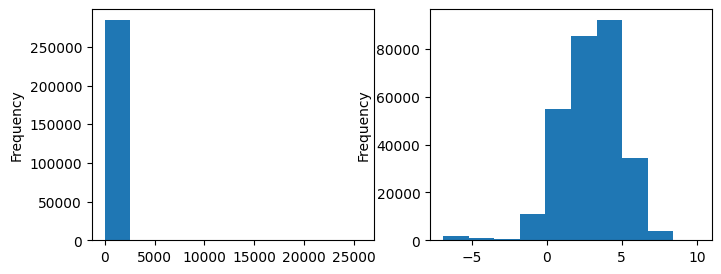

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
df['Amount'].plot(kind='hist', ax=ax1)
df_cp['Amount'].plot(kind='hist', ax=ax2)

In [105]:
labels = df_cp.pop('Class').values
labels

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
features = df_cp.values
features

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  5.00810543e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  9.89912872e-01],
       [ 2.77777778e-04, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  5.93664135e+00],
       ...,
       [ 2.39966667e+01,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  4.21775617e+00],
       [ 2.39966667e+01, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  2.30268509e+00],
       [ 2.39977778e+01, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  5.37990196e+00]])

In [107]:
labels.shape, features.shape

((284807,), (284807, 30))

<Axes: ylabel='count'>

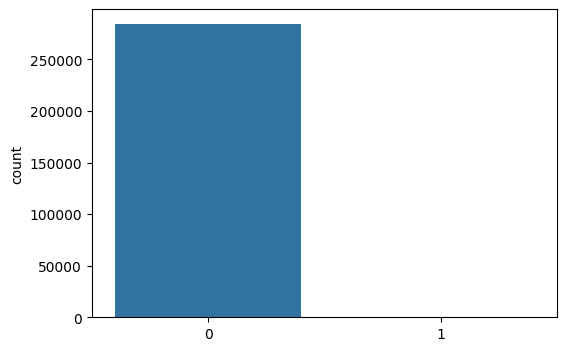

In [108]:
plt.figure(figsize=(6, 4))
sns.countplot(x=labels)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, 
                                                    random_state=42, stratify=labels)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, 
                                                    random_state=42, stratify=y_train)
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((160203, 30), (53402, 30), (71202, 30), (160203,), (53402,), (71202,))

In [132]:
Counter(labels), Counter(y_train), Counter(y_valid), Counter(y_test)

(Counter({0: 284315, 1: 492}),
 Counter({0: 159926, 1: 277}),
 Counter({0: 53310, 1: 92}),
 Counter({0: 71079, 1: 123}))

In [133]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [134]:
METRICS = tf.keras.metrics.AUC(name='auc')

In [135]:
def make_model():
    model = tf.keras.Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[-1],)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
        loss = 'binary_crossentropy', metrics=[METRICS, 'accuracy']
    )
    return model

In [136]:
EPOCHS = 100
BATCH_SIZE = 1024

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True
)

In [137]:
base_model = make_model()
base_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                992       
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
baseline_history = base_model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                                epochs=EPOCHS, callbacks=[early_stopping],
                                validation_data=(X_valid, y_valid))

Epoch 1/100
157/157 [==============================] - 3s 9ms/step - loss: 0.0308 - auc: 0.8444 - accuracy: 0.9898 - val_loss: 0.0039 - val_auc: 0.9289 - val_accuracy: 0.9995
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0048 - auc: 0.9378 - accuracy: 0.9993 - val_loss: 0.0039 - val_auc: 0.9290 - val_accuracy: 0.9994
Epoch 3/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0039 - auc: 0.9479 - accuracy: 0.9994 - val_loss: 0.0039 - val_auc: 0.9291 - val_accuracy: 0.9994
Epoch 4/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0036 - auc: 0.9570 - accuracy: 0.9994 - val_loss: 0.0041 - val_auc: 0.9290 - val_accuracy: 0.9995
Epoch 5/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0032 - auc: 0.9501 - accuracy: 0.9994 - val_loss: 0.0047 - val_auc: 0.9232 - val_accuracy: 0.9990
Epoch 6/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0034 - auc: 0.9627 - accuracy: 0.9993 - val_loss

In [139]:
baseline_history.history['val_accuracy'][-1]

0.9993820190429688

In [140]:
predictions_baseline = base_model.predict(X_test)
predictions_baseline.shape

2226/2226 [==============================] - 4s 2ms/step


(71202, 1)

In [141]:
def plot_cm(y_test, y_pred_proba, threshold):
    
    y_pred = y_pred_proba > threshold    
    cm = confusion_matrix(y_test, y_pred)
    
    print("f1 score:", f1_score(y_test, y_pred))
    print("Accuracy", accuracy_score(y_test, y_pred))
    print("Precision", precision_score(y_test, y_pred))
    print("Recall", recall_score(y_test, y_pred))
    
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion matrix (threshold > {threshold:.2f})')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

f1 score: 0.7949790794979079
Accuracy 0.9993118170837898
Precision 0.8189655172413793
Recall 0.7723577235772358


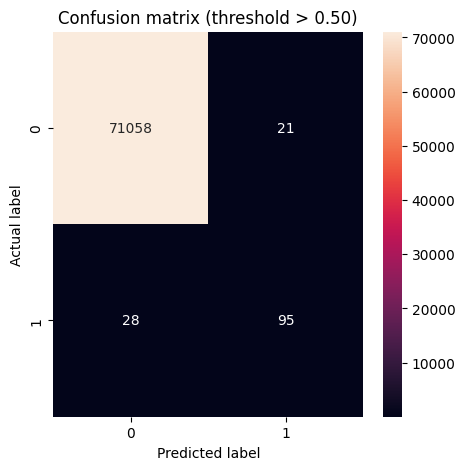

In [142]:
plot_cm(y_test, predictions_baseline, threshold=0.5)

In [143]:
neg, pos, total

(284315, 492, 284807)

In [157]:
weight_for_0 = 1 / neg * total / 2
weight_for_1 = 1 / pos * total / 2
weight_for_0, weight_for_1

(0.5008652375006595, 289.43800813008136)

In [158]:
class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.5008652375006595, 1: 289.43800813008136}

In [159]:
weighted_model = make_model()

In [160]:
weighted_history = weighted_model.fit(
    X_train, 
    y_train, 
    batch_size=BATCH_SIZE,
    epochs=EPOCHS, 
    callbacks=[early_stopping],
    validation_data=(X_valid, y_valid),
    class_weight=class_weight
)

Epoch 1/100


157/157 [==============================] - 3s 10ms/step - loss: 0.3017 - auc: 0.9548 - accuracy: 0.9332 - val_loss: 0.1707 - val_auc: 0.9818 - val_accuracy: 0.9490
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 0.1819 - auc: 0.9782 - accuracy: 0.9590 - val_loss: 0.0965 - val_auc: 0.9798 - val_accuracy: 0.9708
Epoch 3/100
157/157 [==============================] - 1s 7ms/step - loss: 0.1966 - auc: 0.9761 - accuracy: 0.9614 - val_loss: 0.0789 - val_auc: 0.9730 - val_accuracy: 0.9799
Epoch 4/100
157/157 [==============================] - 1s 7ms/step - loss: 0.1363 - auc: 0.9869 - accuracy: 0.9637 - val_loss: 0.0965 - val_auc: 0.9775 - val_accuracy: 0.9738
Epoch 5/100
157/157 [==============================] - 1s 7ms/step - loss: 0.1294 - auc: 0.9889 - accuracy: 0.9735 - val_loss: 0.1298 - val_auc: 0.9704 - val_accuracy: 0.9597
Epoch 6/100
157/157 [==============================] - 1s 7ms/step - loss: 0.1266 - auc: 0.9901 - accuracy: 0.9621 - val_loss: 0.0697 - 

In [161]:
predictions_weighted = weighted_model.predict(X_test)

2226/2226 [==============================] - 4s 2ms/step


In [162]:
weighted_results = weighted_model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(f'{name}: {value}')

loss: 0.1745915412902832
auc: 0.9750537276268005
accuracy: 0.94745934009552


f1 score: 0.05506441020459712
Accuracy 0.9474593410297464
Precision 0.028415015641293014
Recall 0.8861788617886179


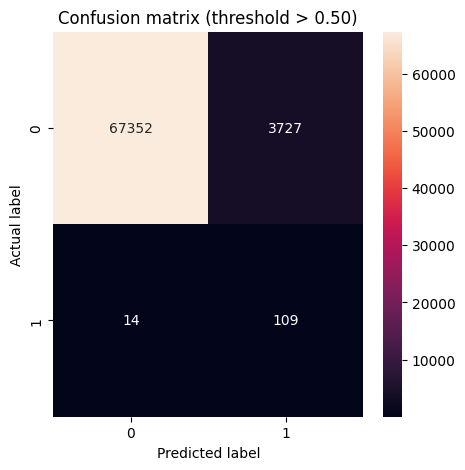

In [163]:
plot_cm(y_test, predictions_weighted, threshold=0.5)

In [164]:
def plot_roc(name, labels, predictions, **kwargs):
    fpr, tpr, _ = roc_curve(labels, predictions)
    auc = roc_auc_score(labels, predictions)

    plt.plot(100 * fpr, 100 * tpr, label=f'auc of {name}={auc:.5f}', linewidth=2, **kwargs)
    plt.xlabel('FPR [%]')
    plt.ylabel('TPR [%]')
    plt.xlim([-0.5, 20])
    plt.ylim([80, 100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    fig = plt.gcf()
    fig.set_size_inches(8, 6)

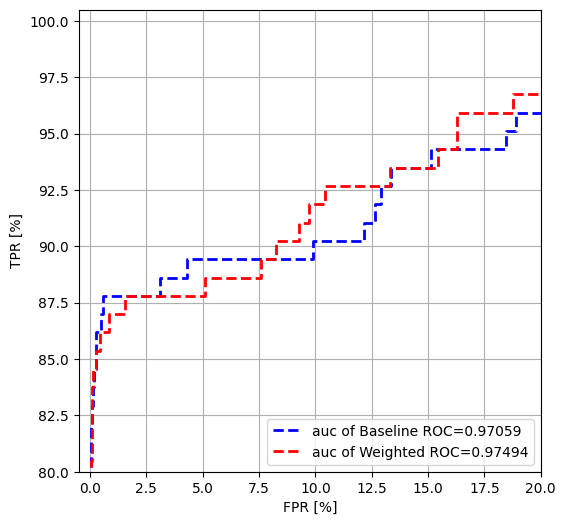

In [165]:
plot_roc('Baseline ROC', y_test, predictions_baseline, color='blue', linestyle='--')
plot_roc('Weighted ROC', y_test, predictions_weighted, color='red', linestyle='--')
plt.legend(loc='lower right')